In [12]:
from __future__ import division
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [13]:
df = pd.read_csv('./ECG_data/chfdb_chf01_275.txt', sep='\t', names=['time', 'val1', 'val2'])
df.head()

,time,val1,val2
0,275.000,-0.645,0.665
1,275.004,-0.635,0.710
2,275.008,-0.645,0.745
3,275.012,-0.635,0.760
4,275.016,-0.645,0.785


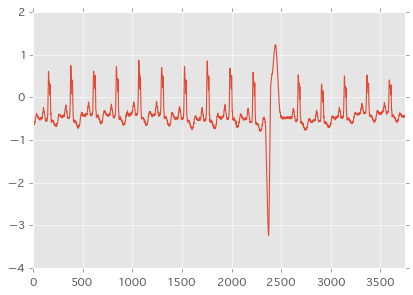

In [14]:
df.val1.plot()

In [15]:
M = 200
L = 250
n = 100

In [16]:
# 時刻tにおけるn本の部分時系列を作る
def create_windows(df, t):
  windows = []
  r = range(n)
  r.reverse()
  for i in r:
    start = t - i - int(M/2)
    end = t - i + int(M/2)
    windows.append(df[start:end].val2.values)
  return np.array(windows)

In [19]:
def anomary_score(df, t):
  current_windows = create_windows(df, t)
  previous_windows = create_windows(df, t-L)
  U_c, _, _ = np.linalg.svd(current_windows, full_matrices=False)
  U_p, _, _ = np.linalg.svd(previous_windows, full_matrices=False)
  U = np.array(U_c[0:3])
  Q = np.array(U_p[0:3])
  eigen_values = np.linalg.svd(U.T.dot(Q), compute_uv=False)
  return 1 - np.sqrt(np.max(eigen_values))

In [20]:
X = np.arange(2000, 3000)
Y = [anomary_score(df, i) for i in X]

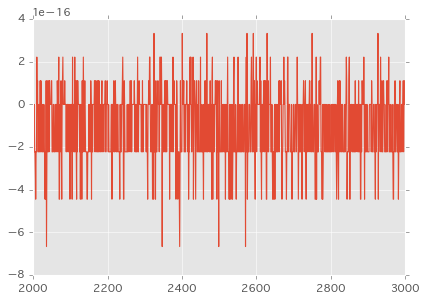

In [21]:
plt.plot(X, Y)